In [1]:
import numpy as np
import uproot4 as uproot
import awkward1 as ak
from collections import OrderedDict
import ROOT as rt
import sys
sys.path.append('/Users/christinawang/Desktop/Caltech/Research/LLP/HNL/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


# CMS_lumi.writeExtraText = 0

Welcome to JupyROOT 6.22/04


In [9]:
import tdrstyle
tdrstyle.setTDRStyle()

In [3]:
# mN    = np.array([2,4,6,8,5,10,15,20])
# mN = np.array([0.1,0.2])
# Vlnu2 = np.array([1e-05,1e-06,1e-07,1e-08,1e-09])
# # Vlnu2 = np.array([2e-05, 4e-05, 6e-05, 8e-05])
# # Vlnu2 = np.array([2e-07, 4e-07, 6e-07, 8e-07])
# # Vlnu2 = np.array([2e-06, 4e-06, 6e-06, 8e-06])
# Vlnu2 = np.array([1e-06,8e-06,6e-06,4e-06,2e-06])
# # Vlnu2 = np.array([1e-05])

# Vlnu2 = np.array([0.1, 0.01,0.001,0.0001])


coupling = {}
# coupling[0.1] = [0.1, 0.01,0.001,0.0001,8e-05,6e-05,4e-05,2e-05]
# coupling[0.5] = [0.1, 0.01,0.001,0.0001,8e-05,6e-05,4e-05,2e-05]

coupling[1] = [0.1, 0.01,0.001,0.0001,8e-05,6e-05,4e-05]
coupling[2] = [0.001,0.0001,1e-05]
coupling[4] = [1e-06,8e-06,6e-06,4e-06,2e-06]

coupling[1] = [4e-05]
coupling[2] = [1e-05]
coupling[4] = [1e-05]


# coupling[1] = [0.1, 0.01,0.001,0.0001,8e-05,6e-05,4e-05,2e-05]
# coupling[2] = [8e-05,6e-05,4e-05,2e-05,1e-06,1e-07]
# coupling[4] = [1e-06,8e-06,6e-06,4e-06,2e-06,1e-05,1e-07,8e-07,6e-07,4e-07,2e-07]



runNum = "01"
# decay_mode = ['e', 'mu', 'tau']
decay_mode = ['e']
root_dir = '/Users/christinawang/Desktop/Caltech/Research/LLP/HNL/Delphes_output/'

In [4]:
fpath = OrderedDict()
tree = OrderedDict()
legend = OrderedDict()
for lep in decay_mode:
    for mass, v in coupling.items():
        for mix2 in v:
            fpath[lep+"_"+str(mass)+"_"+str(mix2)] = root_dir + lep + '/delphes_'+lep+'-'+str(mass)+'-'+str(mix2)+'.root'
            legend[lep+"_"+str(mass)+"_"+str(mix2)] = 'm = '+str(mass)+' GeV, V^{2}='+str(mix2)
for k,v in fpath.items():
    f = uproot.open(v)
    tree[k] = f['Delphes']
    

In [7]:
lepPt = {}
lepEta = {}
llpPt = {}
llpEta = {}
llpE = {}
llpPz = {}
for k, T in tree.items():
    if 'e' in k: pid = 11
    elif 'mu' in k:pid = 13
    else: pid = 15
    
    lep = np.logical_and(np.abs(T['Particle.PID'].array())==pid, np.abs(T['Particle.PID'].array()[T['Particle.M1'].array()])==24)
    assert(np.count_nonzero(ak.sum(lep,axis=1)==1)==10000)
    lepPt[k] = T['Particle.PT'].array()[lep]
    lepEta[k] = T['Particle.Eta'].array()[lep]
    
    llp = np.logical_and(np.abs(T['Particle.PID'].array())==9900001+pid, T['Particle.D2'].array()-T['Particle.D1'].array()==2)
    assert(np.count_nonzero(ak.sum(llp,axis=1)==1)==10000)
    llpPt[k] = T['Particle.PT'].array()[llp]
    llpEta[k] = T['Particle.Eta'].array()[llp]
    llpE[k] = T['Particle.E'].array()[llp]
    llpPz[k] = T['Particle.Pz'].array()[llp]
    



    cscClusterX = ak.flatten(T['CscCluster.X'].array())
    electron = ak.flatten(T['Electron.PT'].array())
    muon = ak.flatten(T['Muon.PT'].array())

    print(k,ak.count_nonzero(np.logical_and(lepPt[k]>35, np.abs(lepEta[k])<2.4))/len(lepPt[k]))
    print(k,ak.count_nonzero(lepPt[k]>35)/len(lepPt[k]))
    print(k,ak.count_nonzero( np.abs(lepEta[k])<2.4)/len(lepPt[k]))


    
    print('endcap', k,ak.count_nonzero(np.logical_and(np.abs(llpEta[k])<2.2,np.abs(llpEta[k])>0.9))/len(lepPt[k]))
    print('barrel', k,ak.count_nonzero(np.abs(llpEta[k])<0.9)/len(lepPt[k]))




#     weight = ak.flatten(T['Event.Weight'].array())
#     tau = np.logical_and(np.abs(T['Particle.PID'].array())==15, np.abs(T['Particle.PID'].array()[T['Particle.M1'].array()])==24)
#     tau = np.logical_and(tau, np.abs(T['Particle.Eta'].array())<2.1)
#     tau = np.logical_and(tau, np.abs(T['Particle.PT'].array())>50)
# #     print(np.count_nonzero(T['Jet/Jet.TauTag'].array()==1)+np.count_nonzero(electron)+np.count_nonzero(muon))
#     recoTau = np.logical_and(T['Jet/Jet.TauTag'].array()==1, T['Jet/Jet.PT'].array()>120)
#     recoTau = np.logical_and(recoTau, np.abs(T['Jet/Jet.Eta'].array())<2.1)
    
# #     print(k,'\t',1.0*len(cscClusterX)/len(weight),'\t',1.0*np.count_nonzero(electron>35)/len(weight))
# #     print(k,'\t',1.0*len(cscClusterX)/len(weight),'\t',1.0*np.count_nonzero(T['Particle.PT'].array()[tau]>35)/len(weight))
#     print(k,'\t',1.0*len(cscClusterX)/len(weight),'\t',1.0*np.count_nonzero(recoTau)/len(weight))

e_1_4e-05 0.2497
e_1_4e-05 0.389
e_1_4e-05 0.6424
endcap e_1_4e-05 0.3176
barrel e_1_4e-05 0.2252
e_2_1e-05 0.2537
e_2_1e-05 0.3938
e_2_1e-05 0.6421
endcap e_2_1e-05 0.3237
barrel e_2_1e-05 0.2206
e_4_1e-05 0.2573
e_4_1e-05 0.4006
e_4_1e-05 0.6342
endcap e_4_1e-05 0.3163
barrel e_4_1e-05 0.2321


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


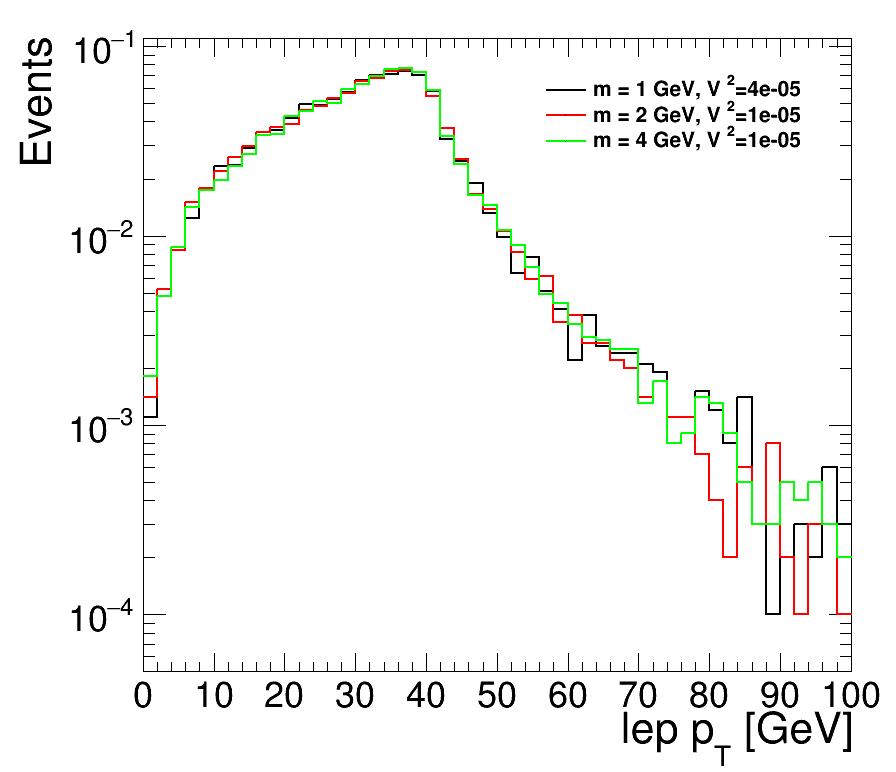

In [10]:
# import importlib
# importlib.reload(sys.modules['tdrstyle'])
# import tdrstyle

# style = tdrstyle.setTDRStyle()

var = [lepPt,lepEta,llpPt,llpE,llpPz,llpEta]
bins = [[50,0,100],[20,0,5],[50,0,500],[50,0,500], [50,0,500],[20,0,5]]
xaxis = ['lep p_{T} [GeV]', 'lep #eta','LLP p_{T} [GeV]','LLP E [GeV]','LLP p_{Z} [GeV]','LLP #eta']
name = ['lepPt','lepEta','llpPt','llpE','llpPz','llpEta']

assert(len(var)==len(bins)==len(xaxis)==len(name))
for index in range(len(var)):
    if not index == 0:continue
    h = {}
    leg = rt.TLegend(0.6,0.80,0.85,0.90)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)

    c = rt.TCanvas('c','c', 900, 800)

    maxi = 0
    for i, m in enumerate(tree.keys()):
        h[m] = create_TH1D(ak.flatten(var[index][m]), axis_title=[xaxis[index], 'Events'], binning = bins[index])
        h[m].SetLineColor(i+1)
        leg.AddEntry(h[m],legend[m])
        h[m].SetMaximum(max(maxi,h[m].GetMaximum()*1.5))
        h[m].DrawNormalized('same')



    c.SetRightMargin(0.05)
    c.SetLogy()
    leg.Draw()
    # c.SetLogx()
    


    c.Draw()
#     c.SaveAs("../plots/gen_level/"+name[index]+".png")


In [4]:

tdrStyle =  rt.TStyle("tdrStyle","Style for P-TDR")

#     #for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(rt.kWhite)
tdrStyle.SetCanvasDefH(600) #Height of canvas
tdrStyle.SetCanvasDefW(600) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(rt.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

# #For the frame:
tdrStyle.SetFrameBorderMode(0)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(2)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

# tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(rt.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle( style = 1001)
# tdrStyle.SetStatX( x = 0)
# tdrStyle.SetStatY( y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.05)
tdrStyle.SetPadBottomMargin(0.13)
tdrStyle.SetPadLeftMargin(0.16)
tdrStyle.SetPadRightMargin(0.02)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.06, "XYZ")
# tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
# tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.05, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(5)
tdrStyle.SetHatchesSpacing(0.05)

tdrStyle.cd()


In [5]:
rt.gROOT.SetStyle("tdrStyle")

In [6]:
rt.gROOT.ForceStyle()

In [10]:
rt.SetOwnership( tdrStyle, False )